Nödvändiga moduler :
pandas: för databehandling i tabellform osv.

matplotlib: för att plotta grafer.

seaborn: för avancerade grafer.

scipy.sparse: hantering av matriser för mindre plats.

sklearn.neighbors: för KNN.

fuzzywuzzy: för att jämföra texter och kunna hitta filmtitlar, trots felstavning.

In [67]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns  

In [6]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

Läsa in CSV filer med Pandas

In [7]:
df_movies = pd.read_csv("movies.csv")
df_ratings = pd.read_csv("ratings.csv")

In [8]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [9]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,1225734739
1,1,110,4.0,1225865086
2,1,158,4.0,1225733503
3,1,260,4.5,1225735204
4,1,356,5.0,1225735119


Funktionen som plockar ut titel från en lista med filmer

In [10]:
def movie_titles(id):
    return df_movies.query("movieId == @id")["title"].item()

In [11]:
movie_titles(15)

'Cutthroat Island (1995)'

En variabel som lagrar de tio filmerna med flest eller högst betyg

In [12]:
most_rated_10 = df_ratings["movieId"].value_counts()[:10]
most_rated_10

movieId
318     122296
356     113581
296     108756
2571    107056
593     101802
260      97202
2959     86207
527      84232
480      83026
1196     80200
Name: count, dtype: int64

In [68]:
most_rated_10_titles = []
for id_of_movies in most_rated_10.index:
    most_rated_10_titles.insert(0, movie_titles(id_of_movies))

En variabel som innehåller de 10 filmerna med högsta betygen

In [14]:
most_rated_10_titles

['Star Wars: Episode V - The Empire Strikes Back (1980)',
 'Jurassic Park (1993)',
 "Schindler's List (1993)",
 'Fight Club (1999)',
 'Star Wars: Episode IV - A New Hope (1977)',
 'Silence of the Lambs, The (1991)',
 'Matrix, The (1999)',
 'Pulp Fiction (1994)',
 'Forrest Gump (1994)',
 'Shawshank Redemption, The (1994)']

Betygsvisualisering för topp 10-filmer med stapeldiagram

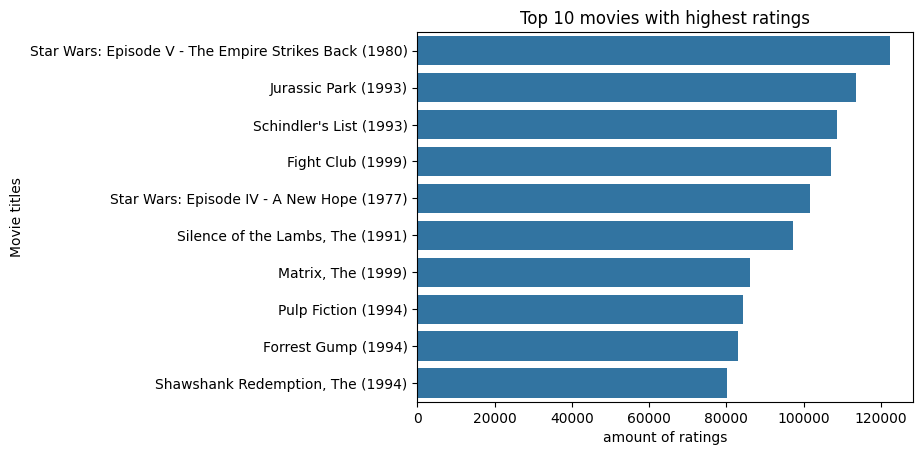

In [15]:
ax = sns.barplot(x=most_rated_10, y=most_rated_10_titles)
ax.set(xlabel="amount of ratings", ylabel="Movie titles", title="Top 10 movies with highest ratings")
plt.show()

Det genomsnittliga värdet av betygen på topp 10-filmerna

In [16]:
most_rated_10_mean = df_ratings[df_ratings["movieId"].isin(most_rated_10.index)]["rating"].mean()
print(f"Mean of top 10 highest rated movies: {most_rated_10_mean:.1f} of 5")

Mean of top 10 highest rated movies: 4.1 of 5


En kolumn i movies dataframe döpt till "year" som visar årtal

In [17]:
df_movies["year"] = df_movies["title"].str[-5:-1]

df_movies.tail()

,movieId,title,genres,year
86532,288967,State of Siege: Temple Attack (2021),Action|Drama,2021
86533,288971,Ouija Japan (2021),Action|Horror,2021
86534,288975,The Men Who Made the Movies: Howard Hawks (1973),Documentary,1973
86535,288977,Skinford: Death Sentence (2023),Crime|Thriller,2023
86536,288983,UNZIPPED: An Autopsy of American Inequality (2...,Documentary,2021


Diagram som visualiserar antal filmer som släppts varje år och identifierar de 10 mest produktiva åren

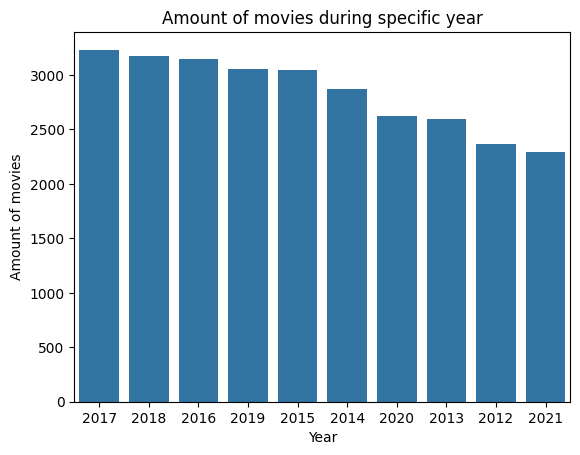

In [18]:
released_movies_year = df_movies["year"].value_counts()[:10]

ax = sns.barplot(y = released_movies_year, x = released_movies_year.index)
ax.set(xlabel = "Year", ylabel = "Amount of movies", title = "Amount of movies during specific year")
plt.show()

Sparse matrix
Visar antal rader inom df_ratings

In [19]:
ratings_amount = df_ratings.shape[0]
ratings_amount

33832162

Antal filmer som finns i df_ratings

In [20]:
movies_amount = df_ratings["movieId"].nunique()
movies_amount

83239

In [21]:
print(f"There is total amount of {ratings_amount:,} ratings for {movies_amount:,} movies".replace(",", " "))

There is total amount of 33 832 162 ratings for 83 239 movies


Antal betyg per film identifieras genom att räkna förekomsten av varje movieID

In [22]:
count_of_ratings = df_ratings["movieId"].value_counts()
count_of_ratings

movieId
318       122296
356       113581
296       108756
2571      107056
593       101802
           ...  
212773         1
194901         1
194572         1
194002         1
193301         1
Name: count, Length: 83239, dtype: int64

Två grupper av filmer: en med mindre än 5000 betyg, och en DataFrame med 5000 eller fler betyg.

In [23]:
ratings_less_5000 = count_of_ratings[count_of_ratings < 5000]
ratings_higher_5000 = count_of_ratings[count_of_ratings >= 5000]
ratings_higher_5000_movies = df_ratings[df_ratings["movieId"].isin(ratings_higher_5000.index)]

In [24]:
ratings_less_5000

movieId
1678      4995
1956      4995
1672      4990
7371      4989
707       4984
          ... 
212773       1
194901       1
194572       1
194002       1
193301       1
Name: count, Length: 81680, dtype: int64

In [25]:
ratings_higher_5000

movieId
318      122296
356      113581
296      108756
2571     107056
593      101802
          ...  
3355       5035
3089       5034
1224       5027
63859      5017
1359       5007
Name: count, Length: 1559, dtype: int64

In [26]:
ratings_higher_5000_movies

,userId,movieId,rating,timestamp
0,1,1,4.0,1225734739
1,1,110,4.0,1225865086
2,1,158,4.0,1225733503
3,1,260,4.5,1225735204
4,1,356,5.0,1225735119
...,...,...,...,...
33832149,330975,6874,4.0,1091684274
33832155,330975,7153,4.0,1091582733
33832159,330975,8622,4.0,1091581777
33832160,330975,8665,3.0,1091581765


In [27]:
ratings_less_5000.sum()

np.int64(10058619)

In [28]:
print(f"Percentage of removed data: {ratings_less_5000.sum() / ratings_amount * 100:.1f}%")

Percentage of removed data: 29.7%


In [29]:
print(f"Percentage of remaining data: {len(ratings_higher_5000_movies) / ratings_amount * 100:.1f}%")

Percentage of remaining data: 70.3%


In [30]:
print(f"Percentage of movies less than 5000 ratings {len(ratings_less_5000)/movies_amount * 100:.1f}%")

Percentage of movies less than 5000 ratings 98.1%


Nu när den återstående datan utgör 70,3 % av all data, representerar de mest populära filmerna bara cirka 1,9 %. Det är därför dags att skapa en sparse matrix.

Först behöver datan omformas så att varje rad motsvarar en film och varje kolumn en användare, där cellerna innehåller användarens betyg. Om ett betyg saknas fylls cellen med 0.

Att det endast blir cirka 1,9 % av filmerna är enkelt att förstå då många människor har inte tid att leta darför ser dom bara "mest populära" filmer

In [38]:
import pandas as pd
from scipy.sparse import csr_matrix

users_request_movies_matrix = csr_matrix(users_request_movies.values)
print(users_request_movies_matrix)


<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 9 stored elements and shape (3, 4)>
  Coords	Values
  (0, 0)	1
  (0, 1)	5
  (0, 3)	2
  (1, 0)	2
  (1, 1)	3
  (1, 2)	4
  (2, 0)	3
  (2, 2)	1
  (2, 3)	5


För att optimera minnesanvändning och beräkningstid i KNN konverteras pivot-tabellen till en sparse-matris.

In [39]:
users_request_movies_matrix = csr_matrix(users_request_movies.values)
users_request_movies_matrix

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 9 stored elements and shape (3, 4)>

Rekommendationssystem behövs byggas med KNN
En filtrerad lista måste utföras med de filmer som är kvar efter att vi har sorterat bort de mindre populära filmerna

In [40]:
recommended_movies = df_movies[df_movies["movieId"].isin(ratings_higher_5000_movies["movieId"].unique())].reset_index()
recommended_movies

,index,movieId,title,genres,year
0,0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,5,Father of the Bride Part II (1995),Comedy,1995
4,5,6,Heat (1995),Action|Crime|Thriller,1995
...,...,...,...,...,...
1554,62208,204698,Joker (2019),Crime|Drama|Thriller,2019
1555,62414,205156,Jojo Rabbit (2019),Comedy|War,2019
1556,63316,207313,Knives Out (2019),Comedy|Crime|Drama|Mystery|Thriller,2019
1557,63916,208703,1917 (2019),Drama|War,2019


KNN-modellen tränas på vår sparse-matris. Antalet närmaste grannar (n_neighbors) sätts till 20 för att kunna identifiera de 20 mest liknande filmerna.

Som likhetsmått används cosine, vilket gör det möjligt att upptäcka hur lika användarnas betygsmönster är mellan filmerna.

För algoritm används brute-force, vilket innebär att varje film jämförs med alla andra filmer för att säkerställa den bästa möjliga matchningen mellan filmerna.

In [60]:
KNN_algorithm = NearestNeighbors(n_neighbors = 20, metric = "cosine", algorithm = "brute")
KNN_algorithm.fit(users_request_movies_matrix)


,n_neighbors,20
,radius,1.0
,algorithm,'brute'
,leaf_size,30
,metric,'cosine'
,p,2
,metric_params,None
,n_jobs,None


I Jupyter-miljön kan du köra om cellen för att visa HTML-representationen, eller välja att lita på notebooken. På GitHub går det inte att rendera HTML-representationen direkt, men sidan kan öppnas via nbviewer.org
 för korrekt visning.

Funktionen låter användaren söka efter en specifik filmtitel för att få rekommendationer på liknande filmer. Utifrån den titel som användaren anger genereras fem rekommendationer baserade på likhet.

Funktionen använder information från:
-DataFrame med rekommenderbara filmer
-Filmtitlar
-KNN-modellen
-Sparse-matrisen

Med hjälp av fuzzy matching (via fuzzywuzzy) identifieras de sex närmaste matchningarna, där den extra matchningen inkluderar den film som användaren själv sökt efter. Därefter returneras de fem mest liknande filmerna som rekommendationer.

In [63]:

def movies_recommendations():
    try: 
        user_input = input("Write the exact title of the movie: ")
        match = process.extractOne(user_input, recommended_movies["title"], score_cutoff=90)
        index = match[2]
        
        _ , indices = KNN_algorithm.kneighbors(users_request_movies_matrix[index], n_neighbors = 6)

        print(f"Top 5 recommendations: {recommended_movies['title'].iloc[indices[0][0]]}")
        
        for neighbor_index in indices[0][1:]:
            print(recommended_movies["title"].iloc[neighbor_index])
    
    except (TypeError, IndexError):
                
                print(f"Sorry! Could not find movie title '{user_input}' in the database.")
                return


In [ ]:

vies_recommendations()

Sorry! Could not find movie title 'The matrix' in the database.


Rekommendationssystemet använder KNN för att hitta filmer som liknar eller matchar med varandra, utifrån betygsättningar som filmerna har fått. Byggs på metoden som kallas collaborative filtering. Metoden utgår ifrån beroende på om flera användare har satt liknande betyg på liknande filmer, då är det med högst sannolikhet att de filmerna är ganska liknande intressemässigt. Därför kan filmer med liknande innehåll rekommenderas, utifrån vad andra med liknande intresse av film har betygsatt.

Algoritmen som denna fungerar jättebra för användare som har satt flera betyg, eller gällande filmer som har fått väldigt många betyg. Dock så fungerar det sämre för nya användare eller filmer med mycket mindre data.

Content-based filtering är en annan metod, som istället fokuserar på filmens egenskaper såsom genre, skådespelare och teman. Systemet i Content-based filtering lär sig just den typen av filmer som användaren gillar, baserad på tidigare val av filmer. Eftersom systemet utgår ifrån innehållet, kan även nya användare få bra liknande rekommendationer, särskilt om systemet har tillgång till en viss information om användaren, som t.ex. ålder, kön, geografisk område, språk osv.